# Interacting with api python project tutorial

In [1]:
# Importar librerías necesarias
import os
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv

In [2]:
# Cargar variables de entorno desde el archivo .env
load_dotenv()

# --- Configuración de la API de Spotify ---
# Obtener Client ID y Client Secret de las variables de entorno
CLIENT_ID = os.getenv("SPOTIPY_CLIENT_ID")
CLIENT_SECRET = os.getenv("SPOTIPY_CLIENT_SECRET")

if not CLIENT_ID or not CLIENT_SECRET:
    print("Error: Las variables de entorno SPOTIPY_CLIENT_ID y SPOTIPY_CLIENT_SECRET no están configuradas.")
    print("Asegúrate de tener un archivo .env en la raíz de tu proyecto con estas variables.")
    exit()

# Autenticación usando Client Credentials Flow (para acceso a datos públicos)
# Este flujo es ideal para aplicaciones de servidor a servidor que no necesitan la interacción del usuario.
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))

print("Conexión a la API de Spotify establecida.")


Conexión a la API de Spotify establecida.


In [11]:
# --- Recuperar Datos de la API de Spotify ---
# Ejemplo: Buscar canciones de un artista específico
artist_name = "Queen"
print(f"Buscando canciones de {artist_name}...")

# Buscar el artista para obtener su ID
results = sp.search(q=f'artist:{artist_name}', type='artist', limit=1)
artist_id = None
if results['artists']['items']:
    artist_id = results['artists']['items'][0]['id']
    print(f"ID de {artist_name}: {artist_id}")
else:
    print(f"Artista '{artist_name}' no encontrado.")
    exit()

# Obtener las 10 canciones más populares del artista
top_tracks_data = []
if artist_id:
    top_tracks = sp.artist_top_tracks(artist_id)
    for track in top_tracks['tracks']:
        top_tracks_data.append({
            'track_id': track['id'],
            'track_name': track['name'],
            'artist_name': artist_name,
            'album_name': track['album']['name'],
            'release_date': track['album']['release_date'],
            'popularity': track['popularity'],
            'duration_ms': track['duration_ms'],
            'explicit': track['explicit'],
            'preview_url': track['preview_url']
        })
        #track_ids.append(track['id']) # Guardar el ID de la canción
    print(f"Se recuperaron {len(top_tracks_data)} canciones principales de {artist_name}.")

Buscando canciones de Queen...
ID de Queen: 1dfeR4HaWDbWqFHLkxsg1d
Se recuperaron 10 canciones principales de Queen.


In [13]:
# Obtener las 10 canciones más populares del artista
top_tracks_data = []
track_ids = [] # Para almacenar los IDs de las canciones para audio_features
if artist_id:
    top_tracks = sp.artist_top_tracks(artist_id)
    for track in top_tracks['tracks']:
        top_tracks_data.append({
            'track_id': track['id'],
            'track_name': track['name'],
            'artist_name': artist_name,
            'album_name': track['album']['name'],
            'release_date': track['album']['release_date'],
            'popularity': track['popularity'],
            'duration_ms': track['duration_ms'],
            'explicit': track['explicit'],
            'preview_url': track['preview_url']
        })
        track_ids.append(track['id']) # Guardar el ID de la canción
    print(f"Se recuperaron {len(top_tracks_data)} canciones principales de {artist_name}.")


Se recuperaron 10 canciones principales de Queen.


In [ ]:
# --- Crear un DataFrame de Pandas ---
if top_tracks_data:
    df = pd.DataFrame(top_tracks_data)
    print("\nDataFrame de Pandas creado:")
    print(df.head())
    print(f"\nDimensiones del DataFrame: {df.shape}")
else:
    print("No se recuperaron datos para crear el DataFrame.")
    exit()




DataFrame de Pandas creado:
                 track_id                                    track_name  \
0  7tFiyTwD0nx5a1eklYtX2J           Bohemian Rhapsody - Remastered 2011   
1  7hQJA50XrCWABAu5v6QZ4i           Don't Stop Me Now - Remastered 2011   
2  11IzgLRXV7Cgek3tEgGgjw              Under Pressure - Remastered 2011   
3  57JVGBtBLCfHw2muk5416J  Another One Bites The Dust - Remastered 2011   
4  54flyrjcdnQdco7300avMJ            We Will Rock You - Remastered 2011   

  artist_name                                        album_name release_date  \
0       Queen  A Night At The Opera (Deluxe Remastered Version)   1975-11-21   
1       Queen                  Jazz (Deluxe Remastered Version)   1978-11-10   
2       Queen             Hot Space (Deluxe Remastered Version)   1982-05-03   
3       Queen              The Game (Deluxe Remastered Version)   1980-06-27   
4       Queen     News Of The World (Deluxe Remastered Version)   1977-10-28   

   popularity  duration_ms  explicit pr

In [5]:
# Explorar otros endpoints de la API de Spotify
# Obtener álbumes de un artista:
albums = sp.artist_albums(artist_id, album_type='album')
for album in albums['items']:
    print(f"  {album['name']} ({album['release_date']})")

  Queen I (Collector's Edition) (2024-10-25)
  Queen I (2024 Mix) (2024-10-25)
  The Miracle (Collector's Edition) (2022-11-18)
  Live Around the World (Deluxe) (2020-10-02)
  Bohemian Rhapsody (The Original Soundtrack) (2018-10-19)
  Queen On Air (2016-10-21)
  A Night at the Odeon (2015-01-01)
  Hungarian Rhapsody (Live In Budapest 1986) (2014-11-14)
  Live at the Rainbow ‘74 (2014-01-01)
  Deep Cuts 3 [(1984-1995) 2011 Remaster] (2011-09-05)
  Deep Cuts 2 [(1977-1982) 2011 Remaster] (2011-06-27)
  Deep Cuts [(1973-1976) 2011 Remaster] (2011-03-14)
  Queen Rock Montreal (2007-10-29)
  On Fire: Live At The Bowl (2004-11-04)
  Made in Heaven (Deluxe Remastered Version) (1995-11-06)
  Made in Heaven (1995-11-06)
  Live At Wembley Stadium (1992-05-26)
  Innuendo (Deluxe Remastered Version) (1991-02-05)
  Innuendo (1991-02-04)
  The Miracle (Deluxe Remastered Version) (1989-05-22)



--- Análisis de Duración vs Popularidad ---


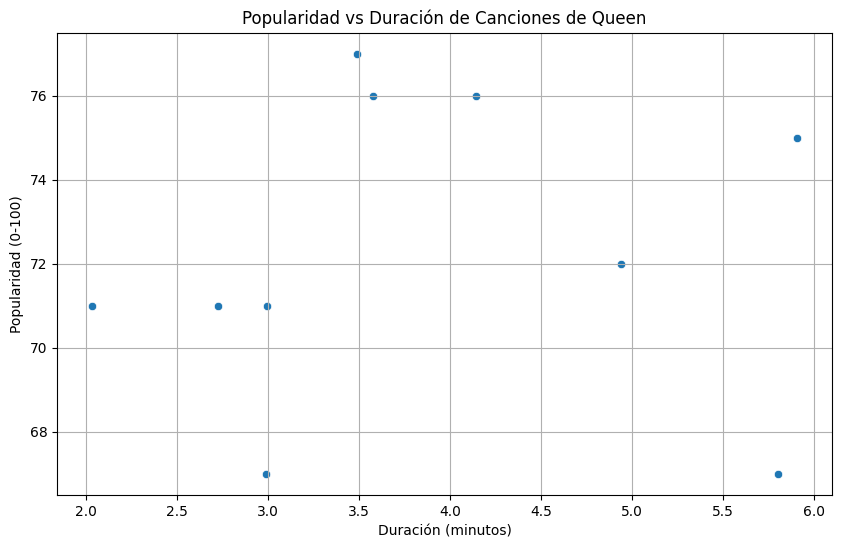

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


# --- Paso 7: Analizar relación estadística (Duración vs Popularidad) ---
print("\n--- Análisis de Duración vs Popularidad ---")

# Convertir duración de milisegundos a minutos para mejor legibilidad
df['duration_min'] = df['duration_ms'] / 60000

# Graficar un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_min', y='popularity', data=df)
plt.title(f'Popularidad vs Duración de Canciones de {artist_name}')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad (0-100)')
plt.grid(True)
plt.show()


## **Análisis de la relación duración-popularidad:**
- Observando el gráfico de dispersión, podemos ver la distribución de las canciones en función de su duración y popularidad.
- Una relación clara (positiva o negativa) entre duración y popularidad no es siempre evidente solo con un scatter plot de pocas canciones.
- A menudo, la popularidad de una canción es multifactorial y no solo depende de su duración.
- Por ejemplo, canciones muy cortas o muy largas podrían tener popularidades variadas. Las canciones de duración 'estándar' (ej. 3-4 minutos) suelen ser las más comunes en las listas de popularidad, pero esto no implica una causalidad directa, sino una tendencia de la industria musical
- Para una conclusión más robusta, se necesitaría un dataset más grande y un análisis de correlación estadística más profundo.
- Pero como se puede apreciar, puede inferirse que no existe relación directa entre la duración de una canción con su popularidad, obervamos canciones en el rango medio de duración con popularidad por encima del 70% e igualmente se observa una canción con una duración cercana a los 6 minutos con un popularidad superior al 70%.
- Lo que sí podemos decir es que la agrupación "Queen" es muy popular.
